# AWS Rekognition - Detectando Celebridades em Imagens
Autor: Wagner Brito<br>
Data: 09/01/2025

In [67]:
from pathlib import Path
import boto3
from mypy_boto3_rekognition.type_defs import CompareFacesMatchTypeDef
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

In [75]:
# Funação adaptada da AWS
def reconhecer_celebridades(photo_origem,photo_destino):
    session = boto3.Session(profile_name='wagner-brito')
    client = session.client('rekognition')
    with open(photo_origem, 'rb') as image:
        response = client.recognize_celebrities(Image={'Bytes': image.read()})
    #print(response)
    contagem = len(response['CelebrityFaces'])
    if contagem > 0:
        draw_boxes(photo_origem, photo_destino, response["CelebrityFaces"])
    return contagem

In [76]:
# Função adapatada do professor
def draw_boxes(
    image_path: str, output_path: str, face_details: list[CompareFacesMatchTypeDef]
) -> None:
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    width, height = image.size
    for face in face_details:
        box = face["Face"]["BoundingBox"]  # type: ignore
        left = int(box["Left"] * width)  # type: ignore
        top = int(box["Top"] * height)  # type: ignore
        right = int((box["Left"] + box["Width"]) * width)  # type: ignore
        bottom = int((box["Top"] + box["Height"]) * height)  # type: ignore
        draw.rectangle([left, top, right, bottom], outline="red", width=3)
        name = face["Name"]  # type: ignore
        #font = ImageFont.truetype("arial.ttf", size=12)
        font = ImageFont.load_default(size=16)
        draw.text((left, bottom + 8), f"{name}", fill="yellow", font=font)
    image.save(output_path)
    print(f"Imagem salva com resultados em: {output_path}")

In [77]:
def identifica_destaca_celebridade(photo_origem,photo_destino):
    celeb_count = reconhecer_celebridades(photo_origem,photo_destino)
    print("Celebridados encontradas: " + str(celeb_count))
    if celeb_count > 0:
        img = Image.open(photo_destino)
        display(img)

Imagem salva com resultados em: images/resultado.jpg
Celebridados encontradas: 3


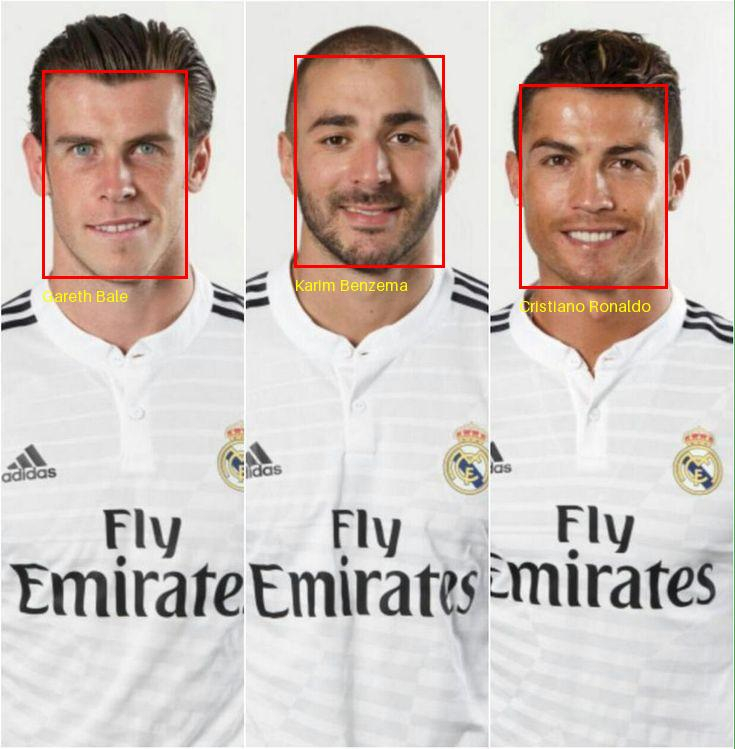

In [80]:
origem = 'images/bbc.jpg'
resultado = 'images/resultado.jpg'
identifica_destaca_celebridade(origem,resultado)

# Conclusão
Aproveitando o código fornecido pela AWS e pelo professor desenvolvi esse notebook para o desafio **AWS Rekognition - Detectando Celebridades em Imagens**.<br>
A foto do Neymar na multidão apresentou um resultado bem estranho mas não tenho, nesse momento, condições de aprimorar o resultado da ferramenta.